# 1. Import librairies

In [2]:
import pandas as pd
import numpy as np
import os
import librosa 
import kerascnn2c
from pathlib import Path
import tensorflow as tf
import copy
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Sequential
import tensorflow.keras.layers as layers
from keras.layers import Input, Conv1D, AvgPool1D, MaxPool1D, ZeroPadding1D, BatchNormalization, Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
#train data creator

# 2. Create train_data

In [4]:
ID=[]
label=[]
# assign directory
directory = '../inputs/cats_dogs/train/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):                               #go into the directory
    for filename in os.listdir(directory+str(folder)):          #go in every class 
        f = os.path.join(directory+str(folder), filename)    #scan through every file in that class
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])
            
train_data=pd.DataFrame()
train_data['ID']=ID
train_data['label']=label
print(train_data)

                      ID label
0             cat_74.wav   cat
1             cat_60.wav   cat
2             cat_48.wav   cat
3            cat_132.wav   cat
4            cat_127.wav   cat
..                   ...   ...
205   dog_barking_84.wav   dog
206  dog_barking_102.wav   dog
207  dog_barking_103.wav   dog
208   dog_barking_85.wav   dog
209   dog_barking_52.wav   dog

[210 rows x 2 columns]


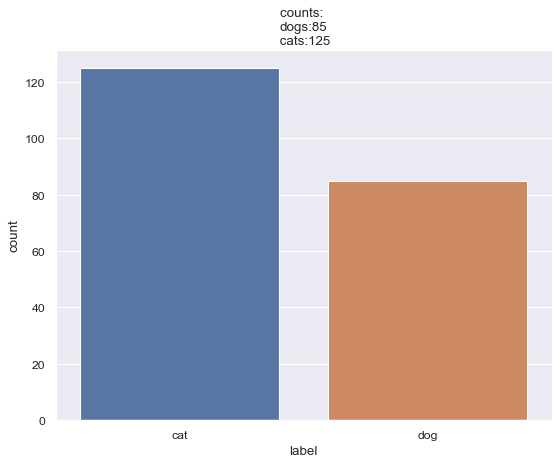

AttributeError: module 'matplotlib' has no attribute 'pyplot'

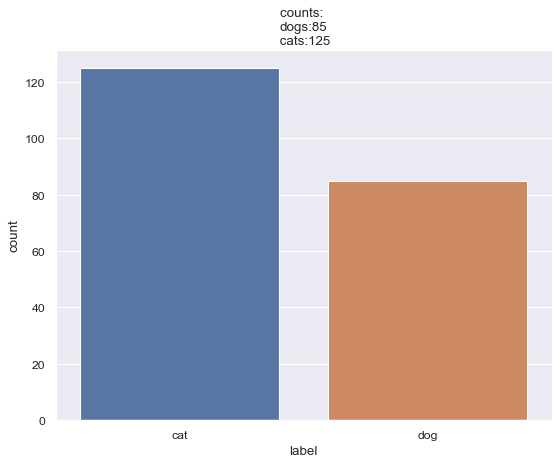

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [5]:
#HERE WE JUST SHOWING THE AMOUNT OF DATAS 86 DOGS & 125 CATS
plt.figure(figsize=(8,6),dpi=80)
sns.set_theme(style="darkgrid")
sns.countplot(x='label',data=train_data)
plt.title('counts: \n' +'dogs:'+str(train_data.label.value_counts()[1])+
          '\n cats:'+str(train_data.label.value_counts()[0]))
plt.show()

# 3. Create test_data

In [7]:
ID=[]
label=[]
# assign directory
directory = '../inputs/cats_dogs/test/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):
    for filename in os.listdir(directory+str(folder)):
        f = os.path.join(directory+str(folder), filename)
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])
            
# WE CHANGE LABELS NAMES FROM TEST TO DOG            
for i in range(len(label)):
    if(label[i]=='test'):
        label[i]='dogs'
        
test_data=pd.DataFrame()
test_data['ID']=ID
test_data['label']=label
print(test_data)

                    ID label
0          cat_126.wav  cats
1          cat_133.wav  cats
2           cat_61.wav  cats
3           cat_75.wav  cats
4           cat_88.wav  cats
..                 ...   ...
62  dog_barking_44.wav  dogs
63  dog_barking_45.wav  dogs
64  dog_barking_90.wav  dogs
65  dog_barking_91.wav  dogs
66  dog_barking_46.wav  dogs

[67 rows x 2 columns]


# 4. Feature extraction of audio files using MFCCs

This function will access the audio files directly from the dataset and automatically store the features for each file in train set

In librosa.load function if we dont write sr=None, it will upsample every audio file to 22Khz which we dont want here.

We are using 100 Mel freq cepstrum coeff. for each audio file.

In [8]:
def extract_features(directory):
    features=[]
    ID=[]
    for folder in os.listdir(directory):
        for filename in os.listdir(directory+str(folder)):
            f = os.path.join(directory+str(folder), filename)
            
            if os.path.isfile(f):
                y,sr=librosa.load(f, res_type='kaiser_fast',sr=None)
                mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=100).T, axis=0)
    
                features.append(mfccs)
                ID.append(f.split('/')[-1])
    return [ID, features]

call on train data set

In [10]:
ID, features_train=extract_features('../inputs/cats_dogs/train/')
ID,features_test=extract_features('../inputs/cats_dogs/test/')

In [ ]:
Création des donnée de train et de test

In [ ]:
X_train=np.array(features_train)
X_test=np.array(features_test)
Y_train=train_data.label
Y_test=test_data.label

In [ ]:
le=LabelEncoder()

temp=le.fit_transform(Y_train)
Y_train=temp.reshape(-1,1)

temp=le.fit_transform(Y_test)
Y_test=temp.reshape(-1,1)

In [25]:
model=tf.keras.Sequential()
model.add(layers.Input(shape=(100, 1)))
model.add(layers.MaxPool1D(pool_size=4, strides=3, padding='valid'))
model.add(layers.Conv1D(filters=64, kernel_size=8, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=1))
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
hist=model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5132 - accuracy: 0.7381
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4048 - accuracy: 0.8571
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3793 - accuracy: 0.8524
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3801 - accuracy: 0.8619
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3293 - accuracy: 0.8857
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3460 - accuracy: 0.8667
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3084 - accuracy: 0.8857
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3119 - accuracy: 0.8810
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3041 - accuracy: 0.8762
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2855 - accuracy: 0.9048
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 6ms/step - loss: 0.0312 - accuracy: 0.9952
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0306 - accuracy: 0.9952
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9952
Epoch 88/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9952
Epoch 91/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 94/100
7/7 [===============

In [28]:
model.save('cat_dogs.h5')

model = tf.keras.Model(model.input, model.layers[-2].output, name=model.name)

res = kerascnn2c.Converter(output_path=Path('gsc_output_fixed'),
                           fixed_point=9, # Number of bits for the fractional part, Q7.9 format
                           number_type='int16_t', # Data type for weights/activations (16 bits quantization)
                           long_number_type='int32_t', # Data type for intermediate results
                           number_min=-(2**15), # Minimum value for 16-bit signed integers
                           number_max=(2**15)-1 # Maximum value for 16-bit signed integers
                          ).convert_model(copy.deepcopy(model))
with open('gsc_model_fixed.h', 'w') as f:
    f.write(res)

———————————————————————————————————————————————————————————————————————————————————————————————————————
Inputs                           | Layer                            | Outputs                         
———————————————————————————————————————————————————————————————————————————————————————————————————————
                                 | input_5                          | max_pooling1d_6                 
-------------------------------------------------------------------------------------------------------
input_5                          | max_pooling1d_6                  | conv1d_6                        
-------------------------------------------------------------------------------------------------------
max_pooling1d_6                  | conv1d_6                         | flatten_2                       
-------------------------------------------------------------------------------------------------------
conv1d_6                         | flatten_2                        

In [29]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 33, 1)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 26, 64)            576       
                                                                 
 flatten_2 (Flatten)         (None, 1664)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1665      
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
____________________________________________________

In [12]:
X_train[0].shape

(100,)

In [30]:
!g++ -Wall -Wextra -pedantic -Ofast -o gsc_fixed -Igsc_output_fixed/ gsc_output_fixed/model.c main.cpp 

clang: warning: treating 'c' input as 'c++' when in C++ mode, this behavior is deprecated [-Wdeprecated]
In file included from gsc_output_fixed/model.c:11:
gsc_output_fixed/number.h:54:22: warning: no newline at end of file [-Wnewline-eof]
#endif //__NUMBER_H__
                     ^
In file included from gsc_output_fixed/model.c:12:
gsc_output_fixed/model.h:26:20: warning: no newline at end of file [-Wnewline-eof]
#endif//__MODEL_H__
                   ^
In file included from gsc_output_fixed/model.c:15:
gsc_output_fixed/max_pooling1d_6.c:57:25: warning: no newline at end of file [-Wnewline-eof]
#undef ACTIVATION_LINEAR
                        ^
In file included from gsc_output_fixed/model.c:16:
gsc_output_fixed/conv1d_6.c:89:23: warning: no newline at end of file [-Wnewline-eof]
#undef ACTIVATION_RELU
                      ^
In file included from gsc_output_fixed/model.c:17:
gsc_output_fixed/weights/conv1d_6.c:151:24: warning: no newline at end of file [-Wnewline-eof]
#undef CONV_KER

In [31]:
!./gsc_fixed x_test_gsc_250.csv y_test_gsc_250.csv

zsh:1: no such file or directory: ./gsc_fixed


In [23]:
Y_pred=model.predict(X_test)
Y_pred=(Y_pred>0.5)*1
print(classification_report(Y_test,Y_pred))

3/3 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        39
           1       0.14      0.18      0.16        28

    accuracy                           0.19        67
   macro avg       0.20      0.19      0.19        67
weighted avg       0.21      0.19      0.20        67



AttributeError: module 'matplotlib' has no attribute 'axes'

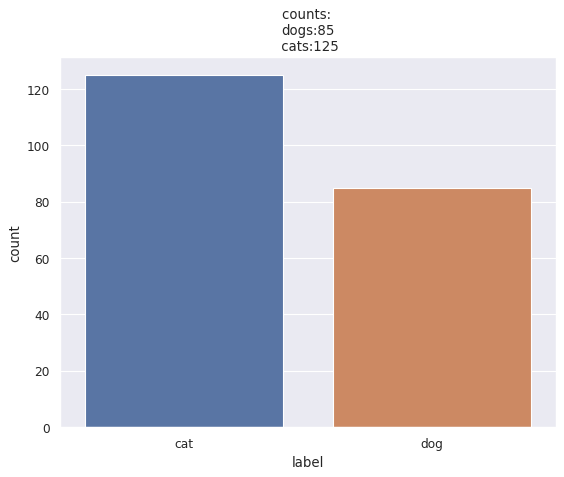

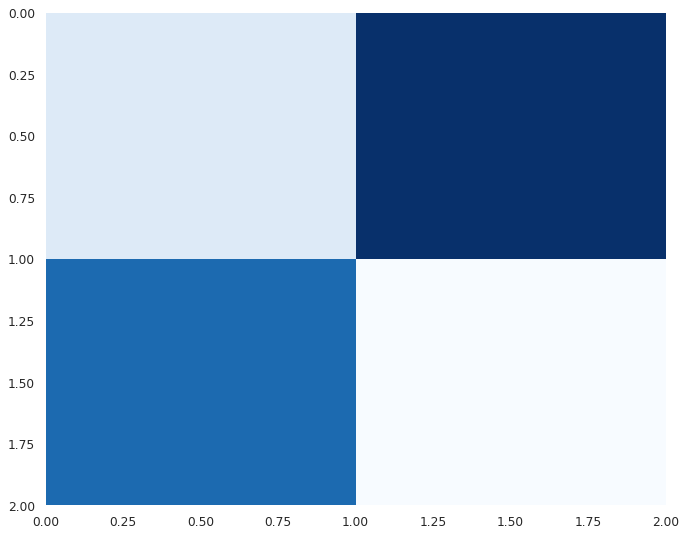

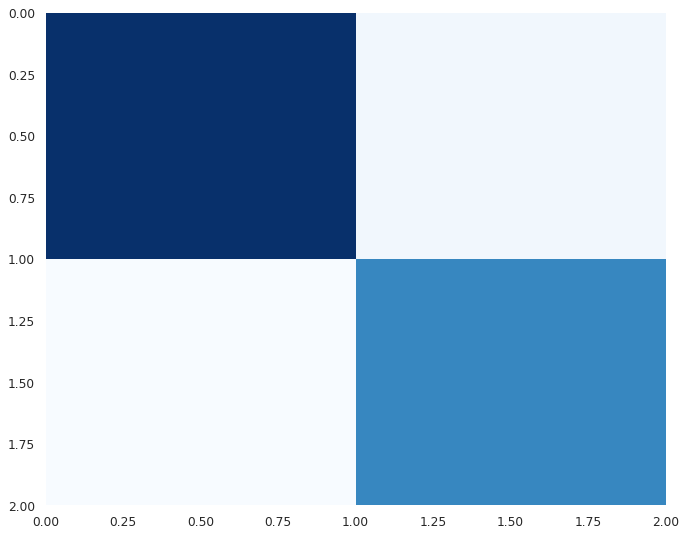

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [51]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred)))
plt.show()